In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [8]:
density_values, intgral_list, system_matrix_size = get_density_list()

CPU_median, CPU_min, CPU_max, CPU_std = load_cpu_stats_from_files("GPU", density_values, "make_complex_CPU.txt")
GPU_median, GPU_min, GPU_max, GPU_std = load_cpu_stats_from_files("GPU", density_values, "make_complex_GPU.txt")
print(system_matrix_size)

[ 191158276  466646404  683195044  967583236 1201176964 1474713604]


C:\Users\Ian\AppData\Local\Temp\ipykernel_31944\2839212950.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


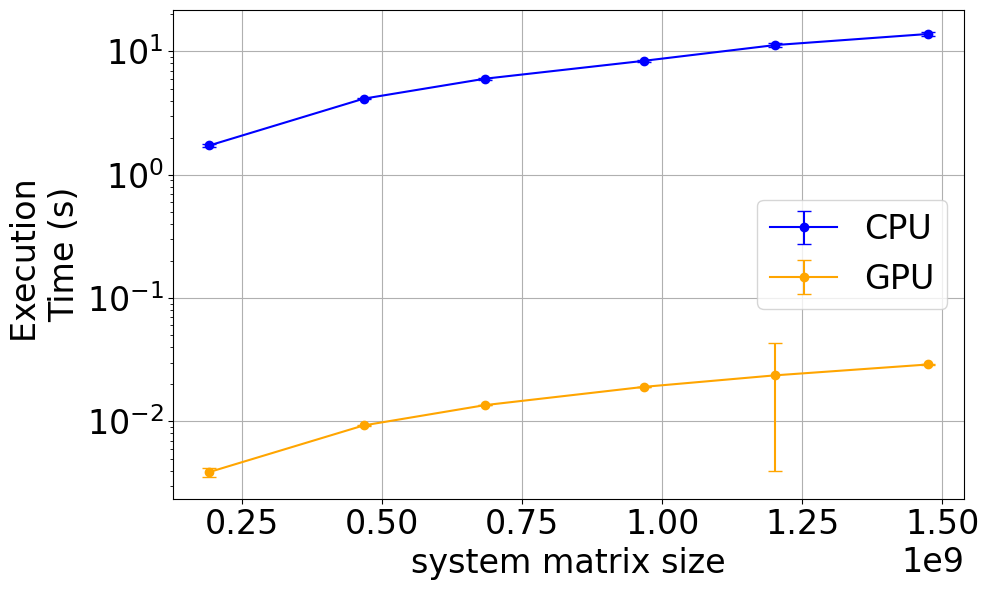

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CPU with error bars
ax.errorbar(
    system_matrix_size, CPU_median, yerr=CPU_std,
    marker='o', label='CPU', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    system_matrix_size, GPU_median, yerr=GPU_std,
    marker='o', label='GPU', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('system matrix size', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
# ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')

fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/make_complex_CPU_vs_GPU.svg", format='svg')
plt.show()